<BarContainer object of 6 artists>

<Figure size 432x288 with 0 Axes>

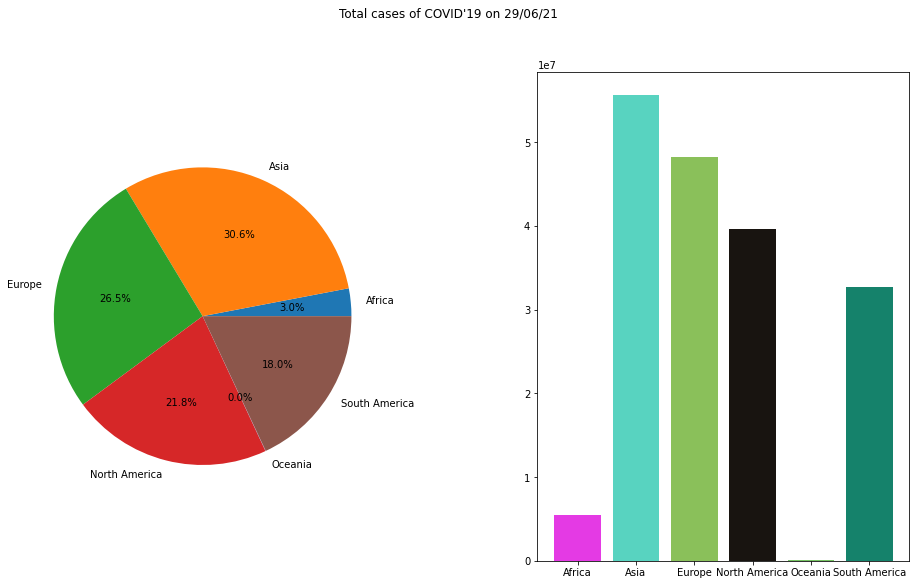

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

filename='Covid-19-World-Dataset.csv'
data=pd.read_csv(filename)

data_290621=data[data['date']=='6/29/2021']
data_290621=data_290621[~data_290621['continent'].isnull()]

Graphic1 = data_290621['total_cases'].groupby(data_290621['continent']).sum()

fig = plt.figure() # create a plot figure
fig = plt.figure(figsize = (16,9))
fig.subplots_adjust(hspace=0.4, wspace=0.4) 

plt.subplot(1,1,1)
plt.suptitle('Total cases of COVID\'19 on 29/06/21')
#plt.title('Total cases of COVID\'19 on 29/06/21')

#----- Pie----
plt.subplot(1,2,1)
plt.pie(Graphic1 , labels=Graphic1.index, autopct="%.1f%%")

#----- BAR in Seaborn----
#import seaborn as sns
ax=plt.subplot(1,2,2)
plt.bar(Graphic1.index, Graphic1, color = np.random.rand(len(Graphic1)+1, 3))
#sns.barplot(x=Graphic1.index, y=Graphic1)

In [5]:
import plotly.express as px
import plotly.graph_objects as go
#from ipywidgets import widgets

#fig = go.Figure()
Graphic2_=pd.DataFrame()
for i in {'Ukraine', 'Canada'}:
    Graphic2=data[data['location']==i][['continent', 'location','date','total_cases','new_cases','population']]
    Graphic2.index=Graphic2['date']
    Graphic2_=Graphic2_.append(Graphic2[['total_cases']])
    Graphic2_.rename(columns={'total_cases':i}, inplace=True)
#    fig.add_trace(px.line(Graphic2_))
#    fig.show()

Graphic2_.sort_index()
    
fig = px.line(Graphic2_, title='Amount of COVID\'19 per Countries')
fig.update_yaxes({"title":"Number of cases"})
fig.show()